# Querying in R

### Using a CSV file

*- Saideva Sathvik R, 22234*

In [1]:
# read in the Titanic dataset
titanic_data <- read.csv("titanic.csv", header = TRUE)

# view the first few rows of the data
head(titanic_data)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


#### How many rows and columns are in the Titanic dataset?

In [7]:
# view the dimensions of the dataset
dim(titanic_data)


[1] 891  12

#### How many passengers survived and how many did not survive?

In [6]:
# count the number of passengers who survived and who did not survive
table(titanic_data$Survived)



  0   1 
549 342 

#### What is the average age of male passengers on the Titanic?

In [5]:
# calculate the average age of male passengers
mean(titanic_data$Age[titanic_data$Sex == "male"], na.rm = TRUE)


[1] 30.72664

#### What is the percentage of passengers who survived in each passenger class?

In [9]:
# calculate the percentage of passengers who survived in each passenger class
prop.table(table(titanic_data$Pclass, titanic_data$Survived), margin = 1)


   
            0         1
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

#### What is the most common age of passengers on the Titanic?

In [10]:
# calculate the most common age of passengers
table(titanic_data$Age, useNA = "ifany")[which.max(table(titanic_data$Age, useNA = "ifany"))]

<NA> 
 177

#### What is the average fare paid by passengers who survived versus those who did not survive?

In [11]:
aggregate(titanic_data$Fare, by = list(Survived = titanic_data$Survived), FUN = mean, na.rm = TRUE)

Survived,x
<int>,<dbl>
0,22.11789
1,48.39541


#### What is the survival rate of passengers based on their age group (child, adult, elderly)?

In [12]:
# create age groups
titanic_data$AgeGroup <- cut(titanic_data$Age, breaks = c(0, 18, 65, Inf), labels = c("child", "adult", "elderly"))

# calculate the survival rate of passengers based on their age group
prop.table(table(titanic_data$AgeGroup, titanic_data$Survived), margin = 1)

         
                  0         1
  child   0.4964029 0.5035971
  adult   0.6137566 0.3862434
  elderly 0.8750000 0.1250000

#### How many passengers had siblings or spouses on board?

In [13]:
sum(titanic_data$SibSp > 0)

[1] 283

#### What is the survival rate of passengers based on their age group, gender, and class?

In [14]:
titanic_data$AgeGroup <- cut(titanic_data$Age, breaks = c(0, 18, 65, Inf), labels = c("child", "adult", "elderly"))

# calculate the survival rate of passengers based on their age group, gender, and class
aggregate(titanic_data$Survived, by = list(AgeGroup = titanic_data$AgeGroup, Sex = titanic_data$Sex, Class = titanic_data$Pclass), FUN = function(x) mean(x, na.rm = TRUE))

AgeGroup,Sex,Class,x
<fct>,<chr>,<int>,<dbl>
child,female,1,0.90909091
adult,female,1,0.97297297
child,male,1,0.80000000
adult,male,1,0.38043478
elderly,male,1,0.25000000
child,female,2,1.00000000
adult,female,2,0.90000000
child,male,2,0.60000000
adult,male,2,0.07317073


#### What is the most common surname among passengers?

In [15]:
# extract the surnames from the passengers' names
titanic_data$Surname <- gsub(".*, ", "", titanic_data$Name)

# count the number of occurrences of each surname
surname_counts <- table(titanic_data$Surname)

# find the most common surname
names(surname_counts)[which.max(surname_counts)]

[1] "Mr. James"

#### What is the survival rate of passengers based on the number of family members on board?

In [16]:
# calculate the total number of family members on board for each passenger
titanic_data$FamilySize <- titanic_data$SibSp + titanic_data$Parch + 1

# calculate the survival rate of passengers based on the number of family members on board
prop.table(table(titanic_data$FamilySize, titanic_data$Survived), margin = 1)

    
             0         1
  1  0.6964618 0.3035382
  2  0.4472050 0.5527950
  3  0.4215686 0.5784314
  4  0.2758621 0.7241379
  5  0.8000000 0.2000000
  6  0.8636364 0.1363636
  7  0.6666667 0.3333333
  8  1.0000000 0.0000000
  11 1.0000000 0.0000000

#### Relationship between the survival rate of passengers and various factors including age, gender, class, and embarkation port.

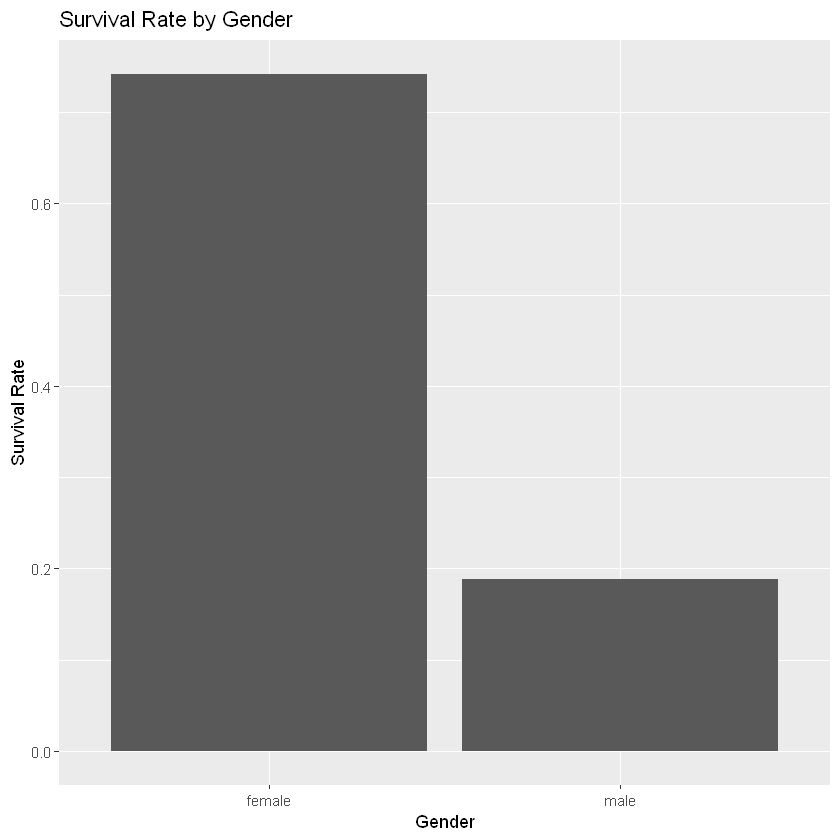

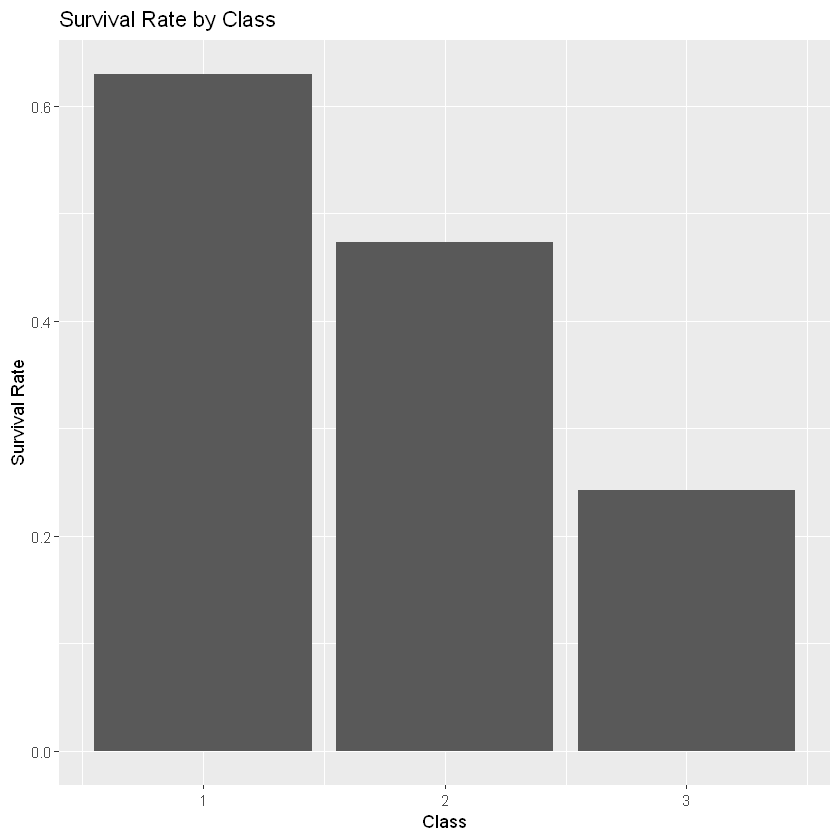

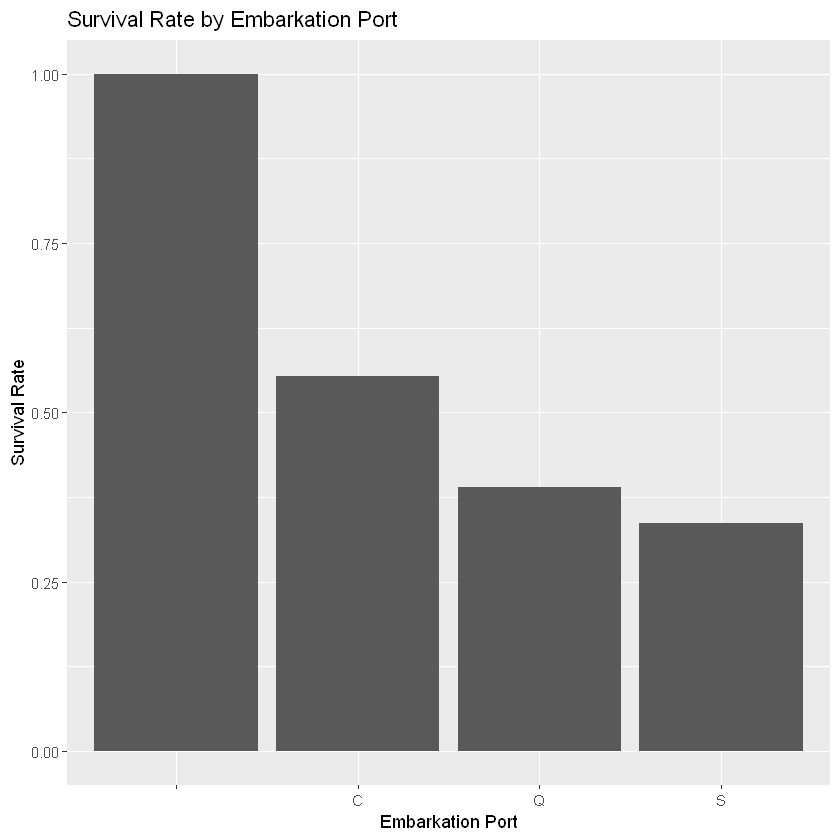

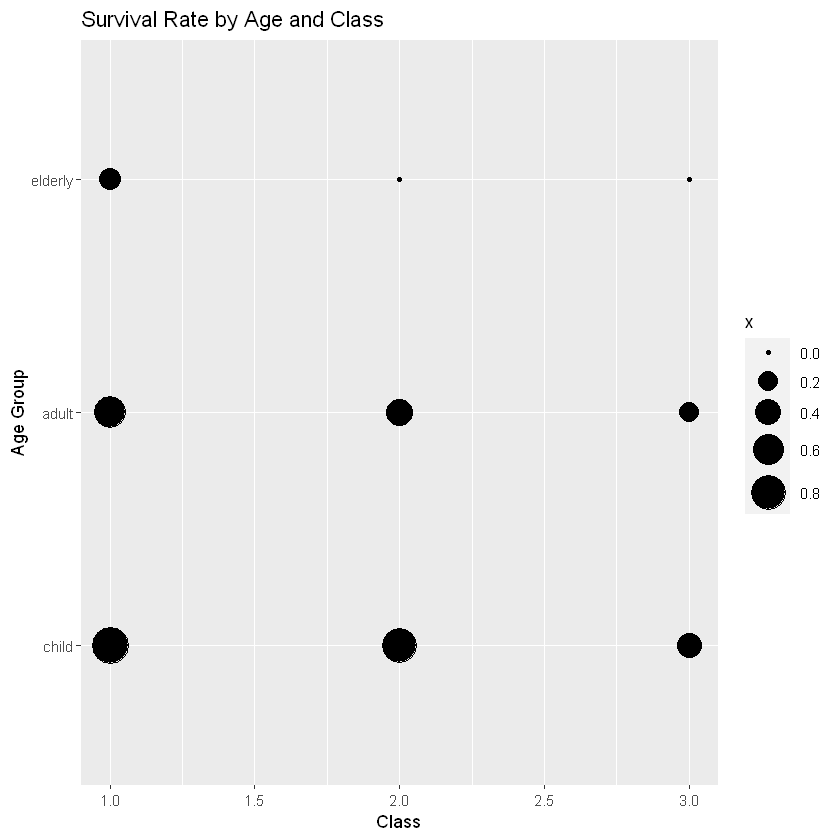

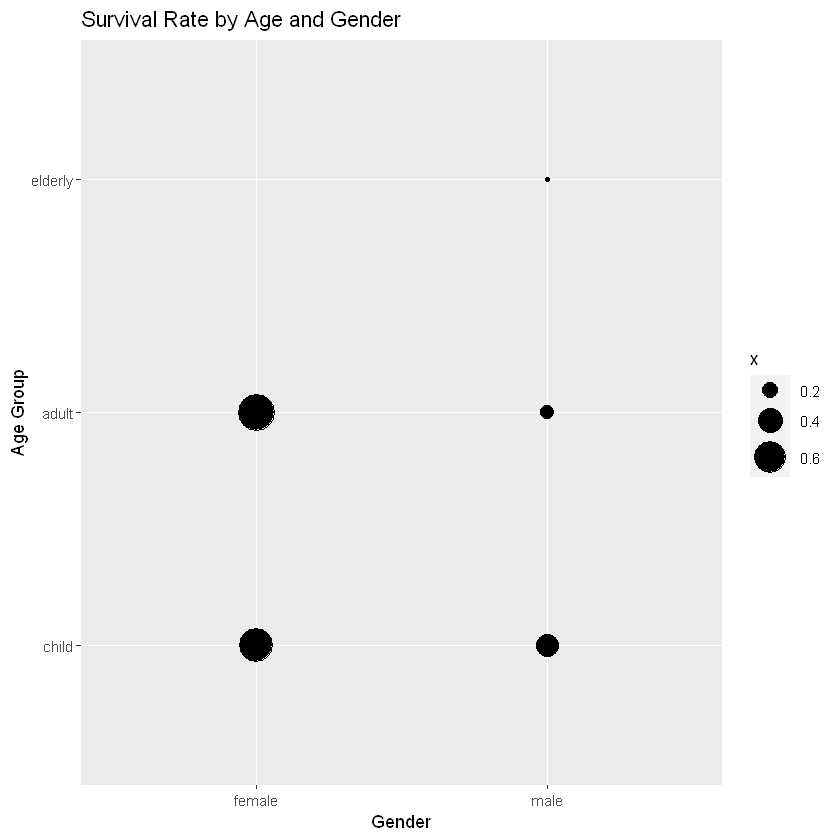

In [17]:
# load necessary libraries
library(ggplot2)

# read in the Titanic dataset
titanic_data <- read.csv("titanic.csv", header = TRUE)

# clean the data
titanic_data$AgeGroup <- cut(titanic_data$Age, breaks = c(0, 18, 65, Inf), labels = c("child", "adult", "elderly"))
titanic_data$FamilySize <- titanic_data$SibSp + titanic_data$Parch + 1

# create a bar chart of the survival rate by gender
gender_survival <- aggregate(titanic_data$Survived, by = list(Sex = titanic_data$Sex), FUN = function(x) mean(x, na.rm = TRUE))
ggplot(data = gender_survival, aes(x = Sex, y = x)) + geom_bar(stat = "identity") + ggtitle("Survival Rate by Gender") + xlab("Gender") + ylab("Survival Rate")

# create a bar chart of the survival rate by class
class_survival <- aggregate(titanic_data$Survived, by = list(Class = titanic_data$Pclass), FUN = function(x) mean(x, na.rm = TRUE))
ggplot(data = class_survival, aes(x = Class, y = x)) + geom_bar(stat = "identity") + ggtitle("Survival Rate by Class") + xlab("Class") + ylab("Survival Rate")

# create a bar chart of the survival rate by embarkation port
port_survival <- aggregate(titanic_data$Survived, by = list(Port = titanic_data$Embarked), FUN = function(x) mean(x, na.rm = TRUE))
ggplot(data = port_survival, aes(x = Port, y = x)) + geom_bar(stat = "identity") + ggtitle("Survival Rate by Embarkation Port") + xlab("Embarkation Port") + ylab("Survival Rate")

# create a scatter plot of the survival rate by age and class
age_class_survival <- aggregate(titanic_data$Survived, by = list(AgeGroup = titanic_data$AgeGroup, Class = titanic_data$Pclass), FUN = function(x) mean(x, na.rm = TRUE))
ggplot(data = age_class_survival, aes(x = Class, y = AgeGroup, size = x)) + geom_point() + ggtitle("Survival Rate by Age and Class") + xlab("Class") + ylab("Age Group") + scale_size_continuous(range = c(1, 10))

# create a scatter plot of the survival rate by age and gender
age_gender_survival <- aggregate(titanic_data$Survived, by = list(AgeGroup = titanic_data$AgeGroup, Sex = titanic_data$Sex), FUN = function(x) mean(x, na.rm = TRUE))
ggplot(data = age_gender_survival, aes(x = Sex, y = AgeGroup, size = x)) + geom_point() + ggtitle("Survival Rate by Age and Gender") + xlab("Gender") + ylab("Age Group") + scale_size_continuous(range = c(1, 10))
